# Dimensionality Reduction Assignment Solutions

## 1. Applying PCA

In [1]:
# 1. Read in the student grades data set
import pandas as pd

df = pd.read_csv('../Data/student_grades.csv')
df.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [2]:
# 2. Drop the first column with student_id
grades = df.iloc[:, 1:]
grades.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


In [3]:
# 3. Center the data
grades_centered = grades - grades.mean()
grades_centered.head()

,math,science,cs,band,english,history,spanish,physed
0,-7.05,-5.22,-2.75,3.96,-26.97,-19.6,-26.56,5.39
1,12.95,11.78,12.25,-4.04,13.03,16.4,9.44,-4.61
2,1.95,-0.22,-2.75,5.96,10.03,8.4,10.44,3.39
3,-0.05,3.78,0.25,9.96,16.03,13.4,19.44,14.39
4,1.95,8.78,5.25,-3.04,21.03,13.4,12.44,-7.61


In [4]:
# 4. Fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(grades_centered)

PCA(n_components=2)

In [5]:
# 5. View and interpret the explained variance ratios: these two components capture 90% of the variation in the data
pca.explained_variance_ratio_

array([0.81844937, 0.09778153])

## 2. Interpreting PCA 

In [6]:
# 1. View and interpret the components of the PCA model

In [7]:
# view the components
pca.components_

array([[ 0.34433892,  0.34662586,  0.32733313, -0.00417335,  0.45552196,
         0.46095972,  0.48354746,  0.01773586],
       [ 0.45069884,  0.44923506,  0.47433583,  0.096715  , -0.33260806,
        -0.31949261, -0.35110809,  0.15725648]])

In [8]:
# view the columns
grades.columns

Index(['math', 'science', 'cs', 'band', 'english', 'history', 'spanish',
       'physed'],
      dtype='object')

**Component interpretation:**
* PC1: higher = better grades in general
* PC2: higher = good at math / science / cs, lower = good at english / history / spanish

In [9]:
# 2. Plot the students on a scatter plot with the x-axis as PC 1 and the y-axis as PC 2

In [10]:
# transform the data
grades_transformed = pd.DataFrame(pca.transform(grades_centered), columns=['PC1', 'PC2'])
grades_transformed.head()

,PC1,PC2
0,-39.221331,18.961672
1,30.547249,2.935450
2,13.219471,-9.100237
3,24.467554,-11.418090
4,27.082869,-9.821059


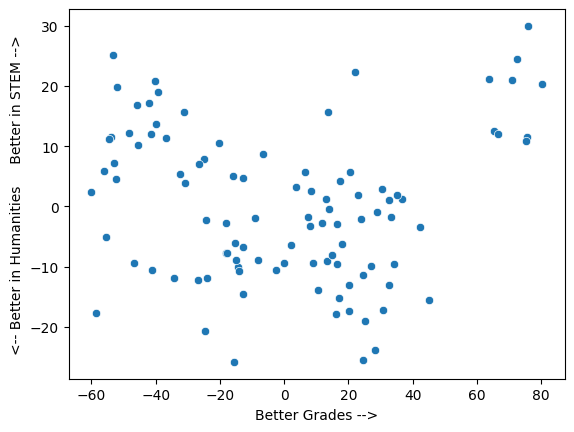

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=grades_transformed)
plt.xlabel('Better Grades -->')
plt.ylabel('<-- Better in Humanities     Better in STEM -->');

In [12]:
# 3. Interpret the clusters of students that you see and make recommendations for the guidance counselor

**Recommendations:**
* The students at the top right have high grades and are good in STEM - **recommend top technical universities for them**
* The students at the top left are strong in STEM, but could use better grades overall - **encourage them to pursue STEM majors**
* The students at the bottom left are strong in humanities, but could use better grades overall - **encourage them to pursue humanities majors**
* For the remaining students in the middle - **work with them to help them figure out what type of careers they are interested in**

## 3. T-SNE

In [13]:
# 1. Fit a t-SNE model with 2 components

# import tsne from sklearn
from sklearn.manifold import TSNE

In [14]:
# create a tsne object
tsne = TSNE(n_components=2, random_state=42)

In [15]:
grades.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


In [16]:
# fit a model and transform the data into a lower dimensionality space
data_tsne = tsne.fit_transform(grades)

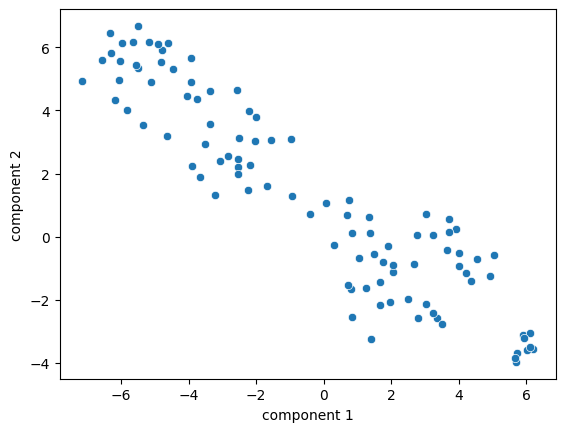

In [17]:
# 2. Plot the students on a scatter plot with the x-axis as component 1 and the y-axis as component 2
df_tsne = pd.DataFrame(data_tsne, columns=['component 1','component 2'])

sns.scatterplot(x='component 1', y='component 2', data=df_tsne);

In [18]:
# 3. Interpret the data you see on the plot
## there seems to be a small cluster of students at the bottom right
## there seem to be three overall clusters

## 4. T-SNE with Colors

In [19]:
grades.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


In [20]:
# 1. Fit a KMeans model with 3 clusters

# Import KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# Fit the model to the data
kmeans.fit(grades)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [21]:
labels, centroids

(array([1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0]),
 array([[57.11363636, 57.79545455, 56.38636364, 70.68181818, 71.88636364,
         74.79545455, 77.18181818, 68.52272727],
        [42.70212766, 42.76595745, 43.04255319, 69.76595745, 45.76595745,
         47.95744681, 49.23404255, 66.57446809],
        [87.22222222, 85.44444444, 85.66666667, 68.33333333, 87.        ,
         90.55555556, 94.        , 68.55555556]]))

In [23]:
df_tsne.head(3)

,component 1,component 2
0,-4.605305,6.143322
1,4.374142,-1.405744
2,1.758275,-0.806502


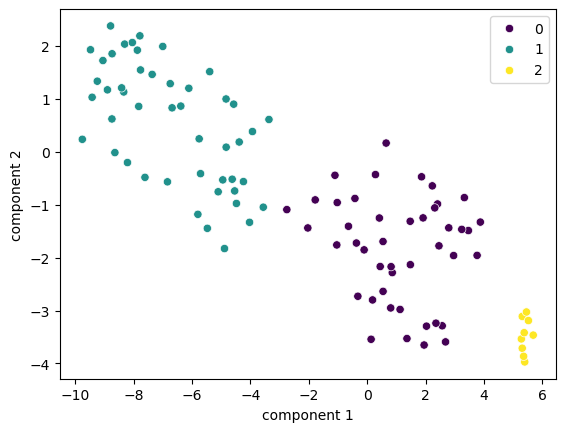

In [19]:
# 2. Overlay the 3 clusters onto a T-SNE plot

# Plot the T-SNE results with colors
sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne, hue=labels, palette='viridis');

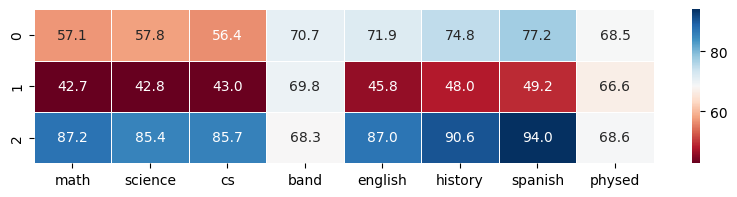

In [26]:
# 3. Interpret the cluster centers

# Create a DataFrame for the heatmap
centroids_df = pd.DataFrame(centroids, columns=grades.columns)

# Create the heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(centroids_df, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5)

# Show the plot
plt.show()

**Cluster interpretations:**
* Cluster 0 are the students who do better in humanities than STEM
* Cluster 1 are the students who are struggling
* Cluster 2 are the students who are excelling

In [25]:
centroids_df

,math,science,cs,band,english,history,spanish,physed
0,57.113636,57.795455,56.386364,70.681818,71.886364,74.795455,77.181818,68.522727
1,42.702128,42.765957,43.042553,69.765957,45.765957,47.957447,49.234043,66.574468
2,87.222222,85.444444,85.666667,68.333333,87.000000,90.555556,94.000000,68.555556
